### Week-2 Assignment

1. Cite four differences between XML and HTMP standards?

2. Are both standards fully declarative one?

In [76]:
import os
import lxml.etree
import tarfile
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


tf = tarfile.open('data/theatre-classique.tar.gz','r')
tf.extractall('data')

In [77]:
subgenres = ('Comédie', 'Tragédie', 'Tragi-comédie')
#print(subgenres)
plays, titles, genres = [], [], []
authors, years = [],[]

In [78]:
for fn in os.scandir('data/theatre-classique'):
    # Only include XML files
    if not fn.name.endswith('.xml'):
        continue
    tree   = lxml.etree.parse(fn.path)
    genre  = tree.find('//genre')
    title  = tree.find('//title')
    author = tree.find('//author')
    year   = tree.find('//date')
    if genre is not None and genre.text in subgenres:
        lines = []
        for line in tree.xpath('//l|//p'):
            lines.append(' '.join(line.itertext()))
        text = '\n'.join(lines)
        plays.append(text)
        genres.append(genre.text)
        titles.append(title.text)
        authors.append(author.text)
        if year is not None:
            years.append(year.text)
            

In [150]:
print (len(plays), len(genres), len(titles), len(authors), len(years))


for ( t, g, a) in zip(titles,genres, authors):
    print(t, " ***", g, " ****" ,a)


498 498 498 498 208
L'AVARE AMOUREUX, COMÉDIE  *** Comédie  **** AIGUEBERRE, Jean Dumas d'
LE CLUB DES DAMES OU LE RETOUR DE DESCARTES, COMÉDIE  *** Comédie  **** (anonyme)
DIALOGUE ENTRE VOLTAIRE ET ROUSSEAU, COMÉDIE  *** Comédie  **** Anonyme
EUDOXIE, TRAGÉDIE.  *** Tragédie  **** CHABANON, Michel Paul Guy de
LE FAUX NOBLE, COMÉDIE.  *** Comédie  **** CHABANON, Michel Paul Guy de
LA JEUNE INDIENNE  *** Comédie  **** CHAMFORT, Sébatien-Roch-Nicolas de 
MUSTAPHA et ZÉANGIR, TRAGÉDIE  *** Tragédie  **** CHAMFORT, Sébatien-Roch-Nicolas de 
LES FRAGMENTS DE MOLIÈRE.  *** Comédie  **** CHAMPMÉSLÉ, Charles Chevillet dit
MOLIÈRE CHEZ NINON OU LA LECTURE DE TARTUFFE, COMÉDIE EN UN ACTE ET EN VERS  *** Comédie  **** CHAZET et DUBOIS
ARLEQUIN JOURNALISTE, COMÉDIE  *** Comédie  **** CHAZET, DUPATY
LAVOCAT DUPÉ, COMÉDIE  *** Comédie  **** CHEVREAU, Urbain
ASTARBÉ, TRAGÉDIE  *** Tragédie  **** COLARDEAU, Charles-Pierre
SOPHIE ET DERVILLE, COMÉDIE.  *** Comédie  **** COLLEVILLE, Anne Hyacinthe Gei

LE NUD D'AMOUR,COMÉDIE EN UN ACTE ET EN PROSE.  *** Comédie  **** POMPIGNY, Maurin de
ARSACE, ROI DES PARTHES, TRAGÉDIE.  *** Tragédie  **** PRADE, Jean Le Royer de
TAMERLAN OU LA MORT DE BAJAZET, TRAGÉDIE  *** Tragédie  **** PRADON, Nicolas
SCIPION L'AFRICAIN, TRAGÉDIE  *** Tragédie  **** PRADON, Nicolas
STATIRA, TRAGÉDIE  *** Tragédie  **** PRADON, Nicolas
ATYS, TRAGÉDIE  *** Tragédie  **** QUINAULT, Philippe
BELLÉROPHON, TRAGÉDIE  *** Tragédie  **** QUINAULT, Philippe
LE DOCTEUR DE VERRE, COMÉDIE  *** Comédie  **** QUINAULT, Philippe
LE FANTOME AMOUREUX, TRAGI-COMÉDIE  *** Tragi-comédie  **** QUINAULT, Philippe
LA MERE COQUETTE ou LES AMANTS BROUILLES, COMÉDIE  *** Comédie  **** QUINAULT, Philippe
STRATONICE, TRAGI-COMÉDIE  *** Tragi-comédie  **** QUINAULT, Philippe
ARLEQUIN AUX ENFERS, COMÉDIE  *** Comédie  **** REGNARD, Jean-François
ARLEQUIN, HOMME À BONNES FORTUNES.   *** Comédie  **** REGNARD, Jean-François
ATTENDEZ-MOI SOUS L'ORME, COMÉDIE  *** Comédie  **** REGNARD, Jean-Fra

Counter({'Comédie': 310, 'Tragédie': 150, 'Tragi-comédie': 38})


c:\users\veda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


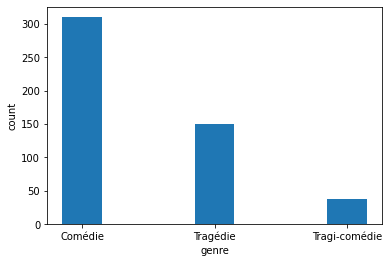

In [80]:
counts = collections.Counter(genres)
print(counts)

fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values(), width=0.3)
ax.set(xlabel="genre", ylabel="count");
fig.show()

In [139]:
for i, author in enumerate(authors):
    print(i , author)


0 AIGUEBERRE, Jean Dumas d'
1 (anonyme)
2 Anonyme
3 CHABANON, Michel Paul Guy de
4 CHABANON, Michel Paul Guy de
5 CHAMFORT, Sébatien-Roch-Nicolas de 
6 CHAMFORT, Sébatien-Roch-Nicolas de 
7 CHAMPMÉSLÉ, Charles Chevillet dit
8 CHAZET et DUBOIS
9 CHAZET, DUPATY
10 CHEVREAU, Urbain
11 COLARDEAU, Charles-Pierre
12 COLLEVILLE, Anne Hyacinthe Geille de Saint-Léger
13 COLLE, Charles
14 Anonyme
15 (anonyme)
16 (anonyme)
17 ANSEAUME, Louis
18 ARCHAMBAULT, Louis-François
19 COUPIGNY, André-François de
20 CRÉBILLON, Prosper J. de
21 ARTAUD, Jean-Baptiste
22 CRÉBILLON, Prosper J. de
23 CRÉBILLON, Prosper J. de
24 CRÉBILLON, Prosper J. de
25 CRÉBILLON, Prosper J. de
26 CRÉBILLON, Prosper J. de
27 CRÉBILLON, Prosper J. de
28 CRÉBILLON, Prosper J. de
29 CUBIÈRES-PALMÉZEAUX, Michel de
30 AIGUEBERRE, Jean Dumas d'
31 CUBIÈRES-PALMÉZEAUX, Michel de
32 CUBIÈRES-PALMÉZEAUX, Michel de
33 CUBIÈRES-PALMÉZEAUX, Michel de
34 CYRANO, Hercule Savinien, dit CYRANO de BERGERAC
35 CYRANO, Hercule Savinien, dit CYRA

In [132]:
len(authors)  # Total 498 authors present

498

###### Are you sure that all these distinct names refer to distinct authors?

No, these are not unique, there are 341 authors have written duplicated books. we found unique authors of 157. In 157 authors I found some author names are miss spelled. For example., scudery, georges de: scudery, geroges de. villiers, claude deschamps de:villiers, claude deschamps dit. campistron, jean g. de : campistron, jean galbert de etc., and some more authors share book with other author, for example., chazet et dubois : chazet, dupaty. barante et dufesny :barante, claude ignace brugière de etc.,

 

In [180]:
# Removing duplicates
authors_total = sorted(np.array(authors))
authors_total = [x.lower() for x in authors_total]
print("authors_total", len(authors_total))
authors_single = np.unique(authors_total)

# listcomprehension
authors_unique = [x.lower() for x in authors_single]
    
authors_unique = np.unique(authors_unique)
print("authors_unique",len(authors_unique))
print("\n".join([x for x in authors_unique]))



authors_total 498
authors_unique 157
(anonyme)
aigueberre, jean dumas d'
alain, robert
andrieux, françois guilaume jean stanislas
anonyme
anseaume, louis
archambault, louis-françois
artaud, jean-baptiste
barante et dufesny
barante, claude ignace brugière de
barbier, marie-anne
beaumarchais, pierre augustin caron de
beaunoir, alexandre-louis-bertrand robineau dit de
bensérade, isaac de
bergasse, nicolas ; chastenet de puységur, armand-marie-jacques.
beys, charles de
biancolelli pierre-françois (1680-1734), riccoboni antoine-françois (1707-1772), riccoboni luigi (1676-1753), romagnesi jean-antoine (1690-1742)
biancolelli, pierre françois
bievre, françois george maréchal, marquis de
blanc, marc antoine
bohaire-dutheil, nicolas de
boissy, louis de
boucher, pierre
boursault, edme
boyer, abel
boyer, claude
brueys et palaprat
brécourt, guillaume marcoureau de
cailhava d'estendoux, jean-françois
campistron, jean g. de
campistron, jean galbert de
carbon de flins, claude de
carmontelle, louis ca

In [183]:
count_array = []
for i in range(len(authors_unique)):
    count = 0
    for j in range(len(authors_total)):
        if(authors_unique[i] == authors_total[j]):
            count = count+1
    count_array.append(count)
    print(authors_unique[i],":",count)

print("Sum of count:",sum(count_array))
#print(authors_lowercase, ":", count)

#print(authors_unique.counter(authors_total))


(anonyme) : 4
aigueberre, jean dumas d' : 2
alain, robert : 1
andrieux, françois guilaume jean stanislas : 1
anonyme : 2
anseaume, louis : 1
archambault, louis-françois : 1
artaud, jean-baptiste : 1
barante et dufesny : 2
barante, claude ignace brugière de : 1
barbier, marie-anne : 1
beaumarchais, pierre augustin caron de : 1
beaunoir, alexandre-louis-bertrand robineau dit de : 3
bensérade, isaac de : 2
bergasse, nicolas ; chastenet de puységur, armand-marie-jacques. : 1
beys, charles de : 1
biancolelli pierre-françois (1680-1734), riccoboni antoine-françois (1707-1772), riccoboni luigi (1676-1753), romagnesi jean-antoine (1690-1742) : 1
biancolelli, pierre françois : 2
bievre, françois george maréchal, marquis de : 1
blanc, marc antoine : 1
bohaire-dutheil, nicolas de : 2
boissy, louis de : 6
boucher, pierre : 1
boursault, edme : 9
boyer, abel : 1
boyer, claude : 9
brueys et palaprat : 1
brécourt, guillaume marcoureau de : 1
cailhava d'estendoux, jean-françois : 1
campistron, jean g. 